### Import Libraries

In [52]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import joblib

### Load Data

In [61]:
df = pd.read_csv("Data/customer_churn_dataset-training-master.csv")
test_df = pd.read_csv('Data/customer_churn_dataset-testing-master.csv')
df_rf = pd.read_csv("Data/customer_churn_dataset-training-master.csv")
test_df_rf = pd.read_csv('Data/customer_churn_dataset-testing-master.csv')


### Explore Data

In [54]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [55]:
df.info()
type(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440832 entries, 0 to 440831
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  int64  
 1   Age                440832 non-null  int64  
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  int64  
 4   Usage Frequency    440832 non-null  int64  
 5   Support Calls      440832 non-null  int64  
 6   Payment Delay      440832 non-null  int64  
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  int64  
 11  Churn              440832 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 40.4+ MB


pandas.core.frame.DataFrame

In [62]:
df = df.drop(columns=['CustomerID', 'Age', 'Usage Frequency'])
test_df = test_df.drop(columns=['CustomerID', 'Age', 'Usage Frequency'])
df_rf = df_rf.drop(columns=['CustomerID'])
test_df_rf = test_df_rf.drop(columns=['CustomerID'])
df.head()

,Gender,Tenure,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,Female,39,5,18,Standard,Annual,932.0,17,1
1,Female,49,10,8,Basic,Monthly,557.0,6,1
2,Female,14,6,18,Basic,Quarterly,185.0,3,1
3,Male,38,7,7,Standard,Monthly,396.0,29,1
4,Male,32,5,8,Basic,Monthly,617.0,20,1


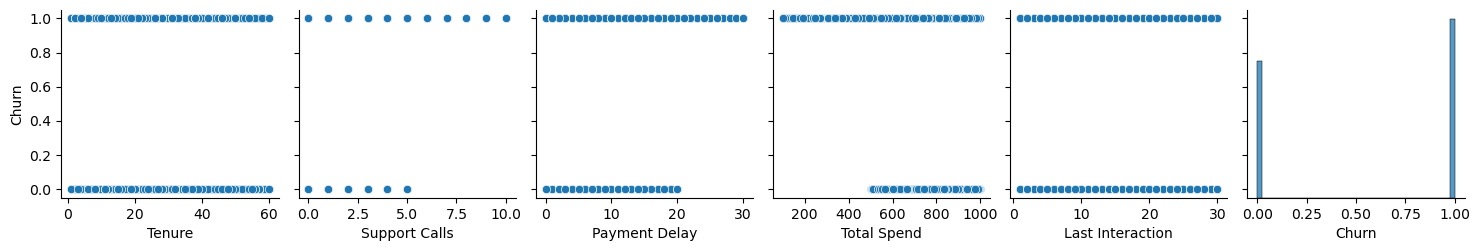

In [57]:
sns.pairplot(data=df, 
             y_vars=['Churn'])

### Feature Scaling

In [66]:
scaler = StandardScaler()
le = LabelEncoder()

#df[[ 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']] = scaler.fit_transform(df[['Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',  'Total Spend', 'Last Interaction']])
columns = ['Gender', 'Subscription Type', 'Contract Length']

for col in columns:
    df[col] = le.fit_transform(df[col])
    test_df[col] = le.fit_transform(test_df[col])
    df_rf[col] = le.fit_transform(df[col])
    test_df_rf[col] = le.fit_transform(test_df[col])


### Save Data

In [67]:
joblib.dump(df, 'Data/customer_churn_training_preprocessed.pkl')
joblib.dump(test_df, 'Data/customer_churn_testing_preprocessed.pkl')
joblib.dump(df_rf, 'Data/customer_churn_training_preprocessed_rf.pkl')
joblib.dump(test_df_rf, 'Data/customer_churn_testing_preprocessed_rf.pkl')

['Data/customer_churn_testing_preprocessed_rf.pkl']